# The Graphinator

use this notebook in order to make your scientific plots nice and homogenous 

### Imports:
(no need to touch this if you don't know what you are doing)

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.ticker import FormatStrFormatter
import numpy as np

import matplotlib
import matplotlib.pylab as pylab

### customizing your graphs:

Below you can customize the appearence of your graphs

In [2]:
# the color map to use for lines:
# (see more options at: https://matplotlib.org/users/colormaps.html )
cmap = matplotlib.cm.get_cmap('Set1')
bin_color_list = [ cmap((i)/9.0)  for i in range(10) ]


# you can also use a customized list of colors (simply 
# uncomment and pick your choice): 
#bin_color_list = ['#EE2727', '#EEBE27', '#78E424', '#3E9853', '#41B9B2', '#1A26BB', '#6520D6', '#C61DA2']



# pick the shapes for scatter plots:
# (options here - https://matplotlib.org/api/markers_api.html)
bin_shapes_list = ['-D','-s','-o','-<','-v','->','-^','-p']



# specific parameter to use e.g fonts, marker sizez etc. 
# (see https://matplotlib.org/users/customizing.html for a detailed list):
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4.5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.family': ['serif'],
         'font.sans-serif' : 'Computer Modern Roman',
         'grid.color': '#c1c1c1',
         'text.usetex' : 'true',
         'legend.framealpha' : '1',
         'lines.markersize': '7.0',
         'lines.markeredgewidth': '0.5'}
pylab.rcParams.update(params)

### Generate Data:

Here we generate and save data to be used for the example plot

In [3]:
x1 = np.linspace(0,2*np.pi,num=100)
y1 = np.cos( x1**2 )

x2 = np.linspace(0,1.75*np.pi,num=25)
y2 = 1.0/(2.1 - np.sin(x2))

np.save('example_data.npy', np.array( [ [x1,y1] , [x2,y2] ] ))

### Plot:

Here we load and Plot the Example Data

<IPython.core.display.Javascript object>


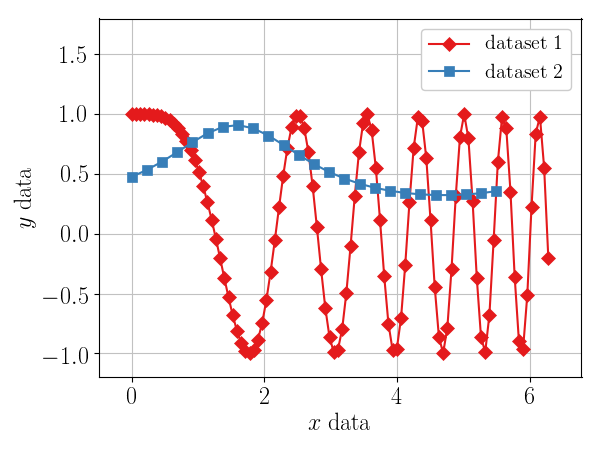

In [4]:
data = np.load('example_data.npy')

# set up the figure and axes 
fig, ax = plt.subplots()

# get the first dataset and plot:
x1,y1 = data[0,0], data[0,1]
ax.plot(x1,y1, bin_shapes_list[0], c = bin_color_list[0], label= 'dataset 1')


# get the second dataset and plot:
x2,y2 = data[1,0], data[1,1]
ax.plot(x2,y2, bin_shapes_list[1], c = bin_color_list[1], label= 'dataset 2')


# set axes limits:
x_min, x_max = np.amin(min([x1,x2], key = np.amin)) , np.amax(max([x1,x2], key = np.amax))
y_min, y_max = np.amin(min([y1,y2], key = np.amin)) , np.amax(max([y1,y2], key = np.amax))
ax.set_xlim([x_min - 0.5 , x_max + 0.5])
ax.set_ylim([y_min - 0.2 , y_max + 0.8])


# set axes labels. note the Latex:
ax.set_xlabel(r'$x$ data')
ax.set_ylabel(r'$y$ data')


# set legend and grid:
ax.legend(loc='best')
ax.grid()


# makes everything nice and clean
plt.tight_layout()


# save as a pdf:
fig.savefig('MyPlot.pdf')